# Outlier Treatment

What are outliers?
- Outliers are the most extreams values in the data. It is an abnormal obserbations that deviate form the norm.
Outliers do not fit in the normal behaviour of the data.

Detect Outliers using following methods
1. Boxplot
2. Histogram
3. Scatter plot
4. Z-score
5. Inter Quartile range (values out of 1.5 time of IQR)

#####  Boxplot
   
![Boxplot](box_plot.png)


### 2.Histogram

![](histogram_outlier.png)

### 3. Scatter plot

![](Scatterplot.png)

### 4. Z-score
![](zscore.png)

### Handle Outlier using Following methods
1. Remove the outliers.
2. Replace outlier with suitable values by using following methods:-
   - Quantile method
   - Inter quartile range
3. Use that ML model which are not sensitive to outilers
4. Like:- KNN, Decision Tree, SVM, Naive Bayes, Ensemble Methods

### 3-Sigma Technique (Standard Deviation)

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import pandas as pd

In [146]:
data=pd.read_csv("Balaji Fast Food Sales.csv")

In [147]:
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [134]:
type(data)

pandas.core.frame.DataFrame

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   1000 non-null   object 
 1   Date            1000 non-null   object 
 2   MobileModel     1000 non-null   object 
 3   Brand           1000 non-null   object 
 4   Price           1000 non-null   float64
 5   UnitsSold       1000 non-null   int64  
 6   TotalRevenue    1000 non-null   float64
 7   CustomerAge     1000 non-null   int64  
 8   CustomerGender  1000 non-null   object 
 9   Location        1000 non-null   object 
 10  PaymentMethod   1000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.1+ KB


In [136]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    print(anomalies)
    return anomalies

In [167]:
random_data_std = statistics.stdev(data['transaction_amount'])
random_data_mean = statistics.mean(data['transaction_amount'])
print(random_data_std,random_data_mean)

204.4029786418918 275.23


In [168]:
list_1 = find_anomalies(data['transaction_amount'])

[900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900]


In [150]:
print(len(list_1))

14


In [151]:
print(len(data))

1000


In [153]:
data.transaction_amount.skew()

1.052643178230624

In [154]:
import seaborn as sns

<Axes: xlabel='transaction_amount', ylabel='Density'>

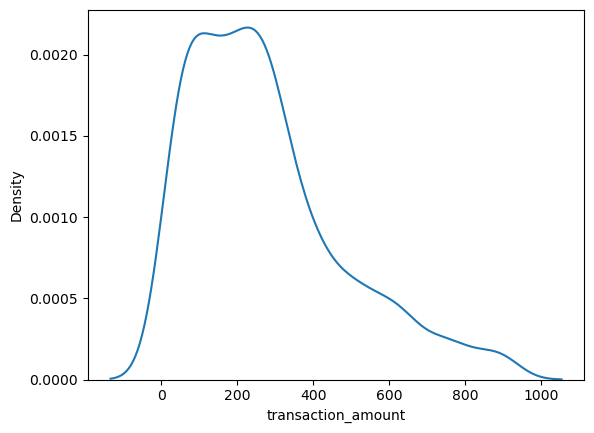

In [156]:
sns.kdeplot(data.transaction_amount)

In [157]:
data['transformed_transaction_amount'] = np.log(data.transaction_amount)

In [158]:
data['transformed_transaction_amount'].skew()

-0.6892402994768292

In [159]:
list_2 = find_anomalies(data.transformed_transaction_amount)

[]


In [160]:
data['double_transformed_transaction_amount'] = np.log(data.transformed_transaction_amount)

In [161]:
data['double_transformed_transaction_amount'].skew()

-1.126486193189751

In [162]:
list_2 = find_anomalies(data.double_transformed_transaction_amount)

[]


<Axes: xlabel='double_transformed_transaction_amount', ylabel='Density'>

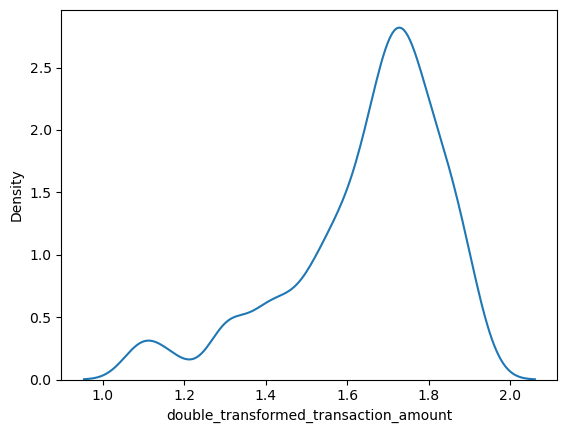

In [163]:
sns.kdeplot(data.double_transformed_transaction_amount)

###  Boxplots

<Axes: >

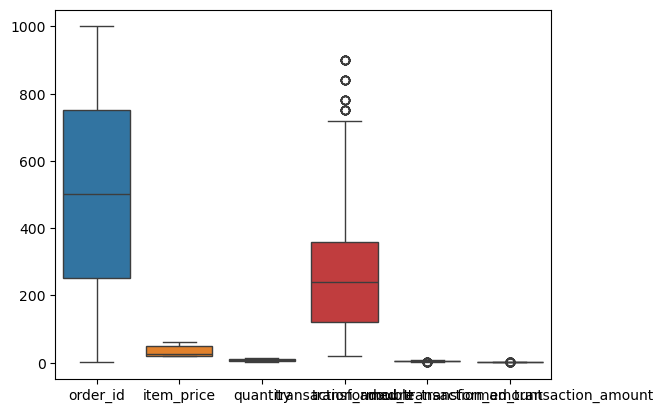

In [164]:
import seaborn as sns
sns.boxplot(data=data)

### Inter Quartile Range
#### IQR=Q3-Q1

In [170]:
list1 = [43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]

In [171]:
len(list1)

25

In [172]:
max(list1)

99

In [173]:

min(list1)

43

In [174]:
import statistics 

statistics.mean(list1)

76.96

In [175]:
sorted(list1)

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

To find the 90th percentile for these (ordered) scores, start by multiplying 90 percent times the total number of scores, which gives 90% ∗ 25 = 0.90 ∗ 25 = 22.5 (the index). Rounding up to the nearest whole number, you get 23.

In [176]:
list2 = sorted(list1)

In [177]:
list2

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

Hence, 98 is the 90th percentile for this dataset

Now say you want to find the 20th percentile. Start by taking 0.20 x 25 = 5 (the index); this is a whole number, which tells you the 20th percentile is the average of the 5th and 6th values in the ordered data set (62 and 66).

so, 20th percentile is 62+66/2 = 64

The median (the 50th percentile) for the test scores is the 13th score: 77.